In [99]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

In [108]:
file_spheres = '/Users/forero/github/Skeleton/Data/Simulaciones/entropiasCV.txt'
file_shells = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_shell.txt'
file_rsd = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_rsd.txt'
file_percentage = '/Users/forero/github/Skeleton/Data/Simulaciones/entropias_por.txt'

In [109]:
data_spheres = np.loadtxt(file_spheres)
data_shells = np.loadtxt(file_shells)
data_rsd = np.loadtxt(file_rsd)
data_percentage = np.loadtxt(file_percentage)

n_spheres = np.shape(data_spheres)[1]
n_beta = np.shape(data_spheres)[0]
n_percentage = np.shape(data_percentage)[1]
beta_values = np.linspace(1.0, 5.0, n_beta)

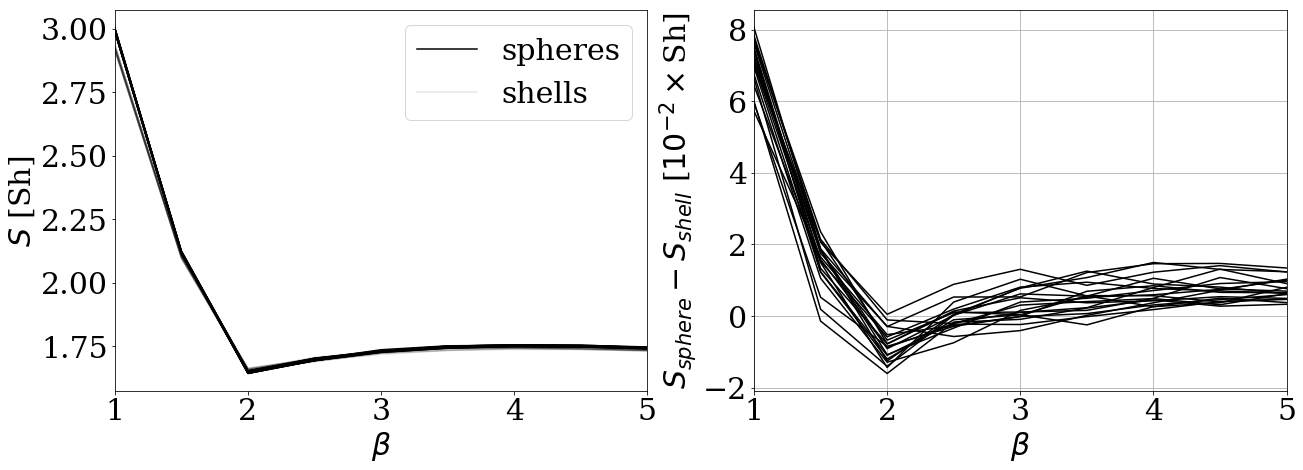

In [110]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_spheres):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label='spheres')
        plt.plot(beta_values, data_shells[:,i], color='black', alpha=0.1, label='shells')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_shells[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_spheres):
    plt.plot(beta_values, 100*(data_spheres[:,i]-data_shells[:,i]), color='black')
plt.ylabel(r"$S_{sphere} - S_{shell}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("geometry.pdf", bbox_inches='tight')


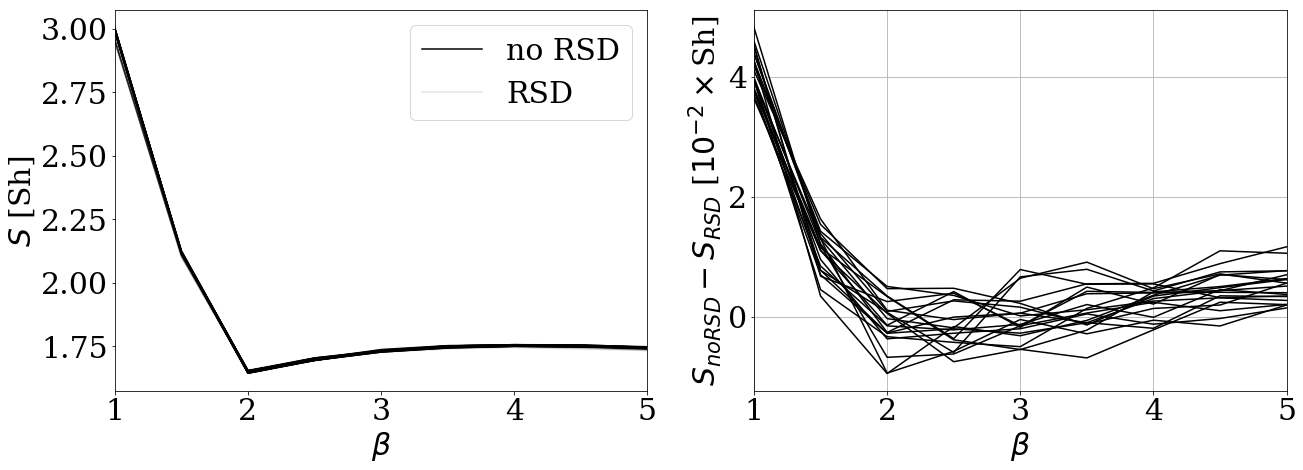

In [111]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_spheres):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label='no RSD')
        plt.plot(beta_values, data_rsd[:,i], color='black', alpha=0.1, label='RSD')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_rsd[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_spheres):
    plt.plot(beta_values, 100*(data_spheres[:,i]-data_rsd[:,i]), color='black')
plt.ylabel(r"$S_{no RSD} - S_{RSD}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("rsd.pdf", bbox_inches='tight')




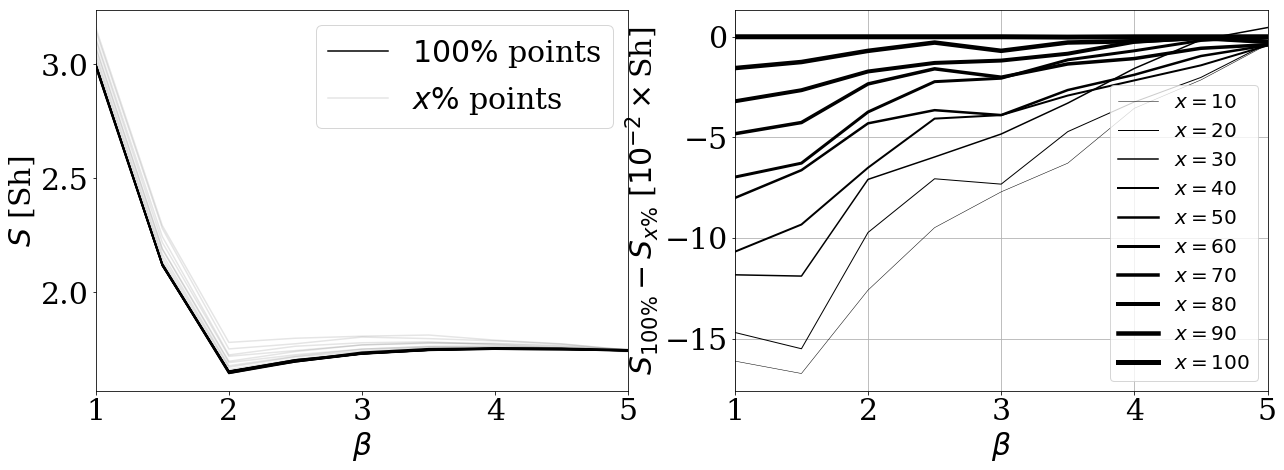

In [130]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
for i in range(n_percentage):
    if i==0:
        plt.plot(beta_values, data_spheres[:,i], color='black', label=r'$100\%$ points')
        plt.plot(beta_values, data_percentage[:,i], color='black', alpha=0.1, label=r'$x\%$ points')
    else:
        plt.plot(beta_values, data_spheres[:,i], color='black')
        plt.plot(beta_values, data_percentage[:,i], color='black', alpha=0.1)
        
plt.ylabel("$S$ [Sh]")
plt.xlabel(r"$\beta$")
plt.legend(fontsize=MEDIUM_SIZE)
plt.xticks(np.arange(1,6))
plt.xlim([1,5])

plt.subplot(1,2,2)
for i in range(n_percentage):
    plt.plot(beta_values, 100*(data_spheres[:,0]-data_percentage[:,i]), color='black', lw=(i+1)/2.0, label=r'$x={}$'.format(10*i + 10))
plt.legend(fontsize=20)
plt.ylabel(r"$S_{100\%} - S_{x\%}$ [$10^{-2}\times$Sh]")
plt.xlabel(r"$\beta$")
plt.xticks(np.arange(1,6)) 
plt.xlim([1,5])
plt.grid()
plt.savefig("n_density.pdf", bbox_inches='tight')


